# Naive Bayes Spam Classifier

This notebook is a part of my learning journey which I've been documenting from Udacity's Natural Language Processing Nanodegree program, which helped me a lot to learn and excel advanced data science stuff such as PySpark. Thank you so much Udacity for providing such quality content. 


Bayes theorem is one of the earliest probabilistic inference algorithms developed by Reverend Bayes (which he used to try and infer the existence of God no less) and still performs extremely well for certain use cases. 

Let us understand Bayes theorom using an example: Let's say you are a member of the Secret Service and you have been deployed to protect the Democratic presidential nominee during one of his/her campaign speeches. Being a public event that is open to all, your job is not easy and you have to be on the constant lookout for threats. So one place to start is to put a certain threat-factor for each person. So based on the features of an individual, like the age, sex, and other smaller factors like is the person carrying a bag?, does the person look nervous? etc. you can make a judgement call as to if that person is viable threat. If an individual ticks all the boxes up to a level where it crosses a threshold of doubt in your mind, you can take action and remove that person from the vicinity. The Bayes theorem works in the same way as we are computing the probability of an event(a person being a threat) based on the probabilities of certain related events(age, sex, presence of bag or not, nervousness etc. of the person). One thing to consider is the independence of these features amongst each other. For example if a child looks nervous at the event then the likelihood of that person being a threat is not as much as say if it was a grown man who was nervous. To break this down a bit further, here there are two features we are considering, age AND nervousness. Say we look at these features individually, we could design a model that flags ALL persons that are nervous as potential threats. However, it is likely that we will have a lot of false positives as there is a strong chance that minors present at the event will be nervous. Hence by considering the age of a person along with the 'nervousness' feature we would definitely get a more accurate result as to who are potential threats and who aren't. 

This is the 'Naive' bit of the theorem where it considers each feature to be independent of each other which may not always be the case and hence that can affect the final judgement.

In short, the Bayes theorem calculates the probability of a certain event happening(in our case, a message being  spam) based on the joint probabilistic distributions of certain other events(in our case, a message being classified as spam).

# Understanding our Dataset
We will be using a [dataset](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection) from the UCI Machine Learning repository which has a very good collection of datasets for experimental research purposes. The direct data link is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00228/).

 ** Here's a preview of the data: **

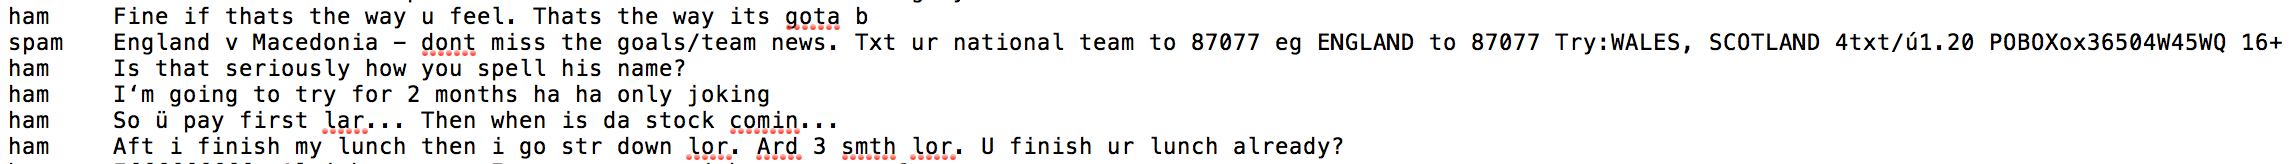

The columns in the data set are currently not named and as you can see, there are 2 columns. 

The first column takes two values, 'ham' which signifies that the message is not spam, and 'spam' which signifies that the message is spam. 

The second column is the text content of the SMS message that is being classified.

In [ ]:
# Importing all the necessary libraries for this project
import pandas as pd

In [ ]:
# Loading the Dataset

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_table('../input/sms-spam-detection/smsspamcollection/SMSSpamCollection',names=['label','sms_message'])

# Printing out first five columns
df.head()

# Data Preprocessing
We need to convert our labels to binary variables, 0 to represent 'ham'(i.e. not spam) and 1 to represent 'spam' for ease of computation.
* We need to convert the values in the 'label' column to numerical values using map method. This maps the 'ham' value to 0 and the 'spam' value to 1.

In [ ]:
df['label'] = df.label.map({'ham':0, 'spam':1})

In [ ]:
df.head()

In [ ]:
# Size of the dataset
df.shape

## Training and testing sets 

Our first step is to split our dataset into a training set and a testing set so we can first train, and then test our model. 

Split the dataset into a training and testing set using the train_test_split method in sklearn, and print out the number of rows we have in each of our training and testing data. Split the data
using the following variables:
* `X_train` is our training data for the 'sms_message' column.
* `y_train` is our training data for the 'label' column
* `X_test` is our testing data for the 'sms_message' column.
* `y_test` is our testing data for the 'label' column. 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

print('Number of rows in the total set: {}'.format(df.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

# Applying Bag of Words processing to our dataset.

Now that we have split the data, our next objective is to follow the steps from "Step 2: Bag of Words," and convert our data into the desired matrix format. To do this we will be using CountVectorizer() as we did before. There are two  steps to consider here:

* First, we have to fit our training data (`X_train`) into `CountVectorizer()` and return the matrix.
* Secondly, we have to transform our testing data (`X_test`) to return the matrix. 

Note that `X_train` is our training data for the 'sms_message' column in our dataset and we will be using this to train our model. 

`X_test` is our testing data for the 'sms_message' column and this is the data we will be using (after transformation to a matrix) to make predictions on. We will then compare those predictions with `y_test` in a later step.

### Bag of Words
Bag of Words(BoW) which is a term used to specify the problems that have a 'bag of words' or a collection of text data that needs to be worked with. The basic idea of BoW is to take a piece of text and count the frequency of the words in that text. It is important to note that the BoW concept treats each word individually and the order in which the words occur does not matter. 

Using a process which we will go through now, we can covert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row,column) values being the frequency of occurrence of each word or token in that document.

For example: 

Lets say we have 4 documents as follows:

`['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']`

Our objective here is to convert this set of text to a frequency distribution matrix, as follows:
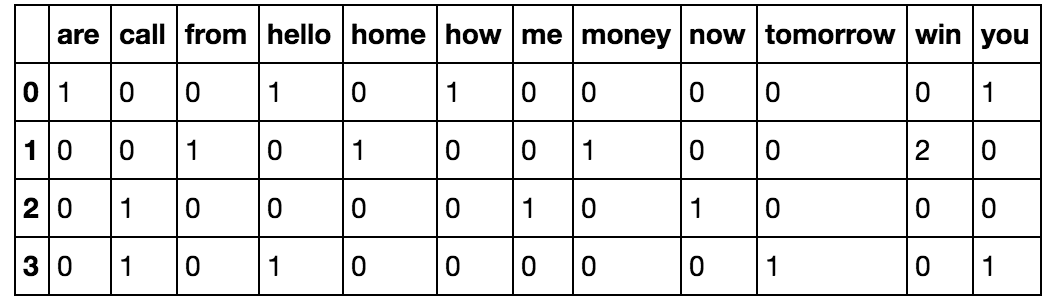
Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns 
[count vectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer) method which does the following:

* It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
* It counts the occurrence of each of those tokens.


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Naive Bayes Implementation

We will be using sklearn's sklearn.naive_bayes method to make predictions on our SMS messages dataset.

Specifically, we will be using the multinomial Naive Bayes algorithm. This particular classifier is suitable for classification with discrete features (such as in our case, word counts for text classification). It takes in integer word counts as its input. On the other hand, Gaussian Naive Bayes is better suited for continuous data as it assumes that the input data has a Gaussian (normal) distribution.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes = MultinomialNB()
naive_bayes.fit(training_data, y_train)

In [ ]:
predictions = naive_bayes.predict(testing_data)

# Evaluating our model 

Now that we have made predictions on our test set, our next goal is to evaluate how well our model is doing. There are various mechanisms for doing so, so first let's review them.

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all positives (all words classified as spam, regardless of whether that was the correct classification). In other words, precision is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives (words classified as spam, and which actually are spam) to all the words that were actually spam. In other words, recall is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case - for example if we had 100 text messages and only 2 were spam and the other 98 weren't - accuracy by itself is not a very good metric. We could classify 90 messages as not spam (including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam (all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the **F1 score**, which is the weighted average of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: ', format(accuracy_score(y_test, predictions)))
print('Precision score: ', format(precision_score(y_test, predictions)))
print('Recall score: ', format(recall_score(y_test, predictions)))
print('F1 score: ', format(f1_score(y_test, predictions)))